## Covid-19 Analysis 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set()

raw_data = pd.read_csv("Data2.csv")
df = raw_data.copy()
df.tail(10)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests per thousand people,Cases,Deaths
18122,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-08,0.084,4451.0,102.0
18123,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-09,0.081,4575.0,102.0
18124,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-10,0.094,4649.0,104.0
18125,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-11,0.101,4748.0,104.0
18126,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-12,0.099,4818.0,104.0
18127,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-13,0.102,4893.0,122.0
18128,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-14,NaN,4990.0,128.0
18129,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-15,NaN,5072.0,128.0
18130,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-16,NaN,5176.0,130.0
18131,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1899.77,16529904,19,3,2020-08-17,NaN,5261.0,132.0


In [3]:
df.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests per thousand people    5228
Cases                               214
Deaths                              214
dtype: int64

In [4]:
df = df.fillna(0)
df.isnull().sum()

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests per thousand people    0
Cases                              0
Deaths                             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18132 entries, 0 to 18131
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           18132 non-null  object 
 1   Continent                        18132 non-null  object 
 2   Latitude                         18132 non-null  float64
 3   Longitude                        18132 non-null  float64
 4   Average temperature per year     18132 non-null  int64  
 5   Hospital beds per 1000 people    18132 non-null  float64
 6   Medical doctors per 1000 people  18132 non-null  float64
 7   GDP/Capita                       18132 non-null  float64
 8   Population                       18132 non-null  int64  
 9   Median age                       18132 non-null  int64  
 10  Population aged 65 and over (%)  18132 non-null  int64  
 11  Date                             18132 non-null  object 
 12  Daily tests per th

In [6]:
df['Cases'] = df['Cases'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18132 entries, 0 to 18131
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Entity                           18132 non-null  object        
 1   Continent                        18132 non-null  object        
 2   Latitude                         18132 non-null  float64       
 3   Longitude                        18132 non-null  float64       
 4   Average temperature per year     18132 non-null  int64         
 5   Hospital beds per 1000 people    18132 non-null  float64       
 6   Medical doctors per 1000 people  18132 non-null  float64       
 7   GDP/Capita                       18132 non-null  float64       
 8   Population                       18132 non-null  int64         
 9   Median age                       18132 non-null  int64         
 10  Population aged 65 and over (%)  18132 non-null  int64    

## Plot 1: Heatmap

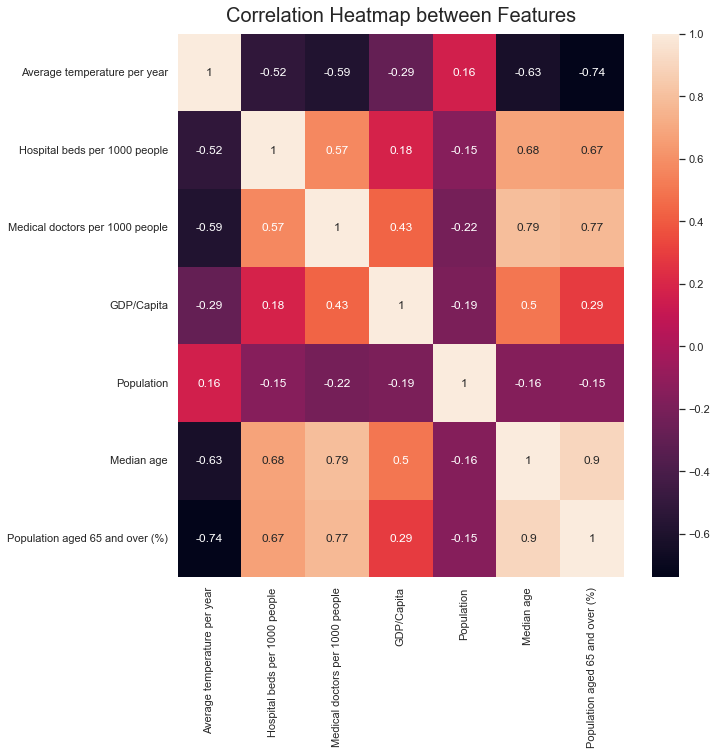

In [7]:
col_drop = ['Entity','Continent','Latitude','Longitude','Date','Daily tests per thousand people','Cases','Deaths']
df_heatmap = df.copy()
df_heatmap = df_heatmap.drop(col_drop, axis=1)

plt.figure(figsize=(10,10))
plt.title("Correlation Heatmap between Features", fontsize=20, pad=12)
plt.xlabel('xlabel',fontsize=15)
plt.ylabel('ylabel',fontsize=15)
heat_map = sns.heatmap(df_heatmap.corr().round(2), annot=True)

## Plot 2: Total Cases/Deaths worldwide vs Time

In [8]:
df1 = df.copy()
cases_vs_time = (df1
                .filter(['Date','Cases'])
                .groupby('Date')
                .agg('sum')
                .reset_index())
cases_vs_time

,Date,Cases
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
226,2020-08-13,19699373
227,2020-08-14,19975204
228,2020-08-15,20253168
229,2020-08-16,20502147


Text(0.5, 1.0, 'Total Covid-19 Cases worldwide over time')

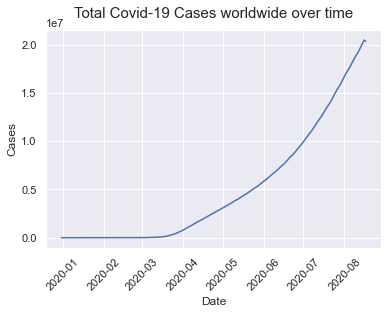

In [9]:
c_vs_t = sns.lineplot(data = cases_vs_time, x = 'Date', y = 'Cases')
plt.xticks(rotation=45)
plt.title("Total Covid-19 Cases worldwide over time", fontsize=15, pad=12)

In [10]:
deaths_vs_time = (df1
                .filter(['Date','Deaths'])
                .groupby('Date')
                .agg('sum')
                .reset_index())
deaths_vs_time

,Date,Deaths
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
226,2020-08-13,721990
227,2020-08-14,726298
228,2020-08-15,732337
229,2020-08-16,737775


Text(0.5, 1.0, 'Total Covid-19 Deaths worldwide over time')

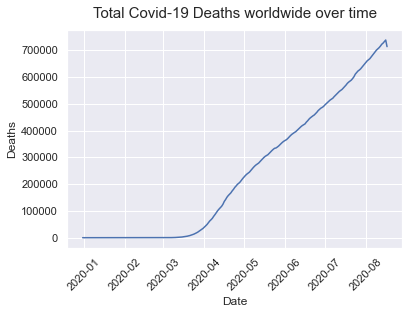

In [11]:
d_vs_t = sns.lineplot(data = deaths_vs_time, x = 'Date', y = 'Deaths')
plt.xticks(rotation=45)
plt.title("Total Covid-19 Deaths worldwide over time", fontsize=15, pad=12)

## Plot 3: total Cases/Deaths by Continent over time

In [12]:
cases_vs_continent = (df1
                     .filter(['Date','Continent','Cases'])
                     .groupby(['Date','Continent'])
                     .agg('sum')
                     .reset_index())
cases_vs_continent

,Date,Continent,Cases
0,2019-12-31,Africa,0
1,2019-12-31,Asia,0
2,2019-12-31,Europe,0
3,2019-12-31,North America,0
4,2019-12-31,Oceania,0
...,...,...,...
1381,2020-08-17,Asia,6271290
1382,2020-08-17,Europe,1810380
1383,2020-08-17,North America,6184151
1384,2020-08-17,Oceania,24596


<AxesSubplot:title={'center':'Total Cases by Continents over time'}, xlabel='Date', ylabel='Cases'>

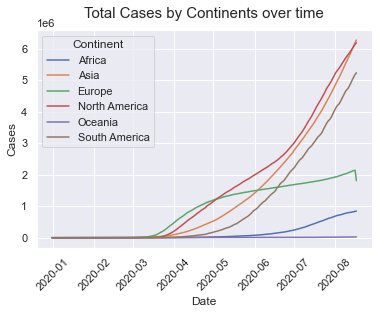

In [13]:
c_vs_conti = sns.lineplot(data = cases_vs_continent, x = 'Date', y = 'Cases', hue = 'Continent')
plt.xticks(rotation=45)
plt.title("Total Cases by Continents over time", fontsize=15, pad=12)
c_vs_conti


In [14]:
deaths_vs_continent = (df1
                     .filter(['Date','Continent','Deaths'])
                     .groupby(['Date','Continent'])
                     .agg('sum')
                     .reset_index())
deaths_vs_continent

,Date,Continent,Deaths
0,2019-12-31,Africa,0
1,2019-12-31,Asia,0
2,2019-12-31,Europe,0
3,2019-12-31,North America,0
4,2019-12-31,Oceania,0
...,...,...,...
1381,2020-08-17,Asia,125853
1382,2020-08-17,Europe,156110
1383,2020-08-17,North America,238602
1384,2020-08-17,Oceania,419


<AxesSubplot:title={'center':'Total Deaths by Continents over time'}, xlabel='Date', ylabel='Deaths'>

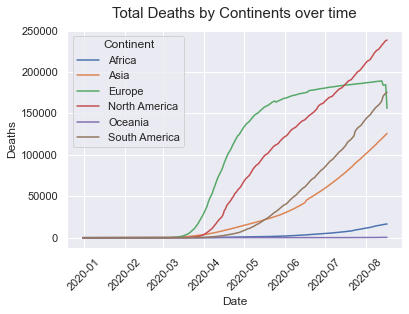

In [15]:
d_vs_conti = sns.lineplot(data = deaths_vs_continent, x = 'Date', y = 'Deaths', hue = 'Continent')
plt.xticks(rotation=45)
plt.title("Total Deaths by Continents over time", fontsize=15, pad=12)
d_vs_conti


## Normalisation of Features in Dataset

In [16]:
df_col_list = list(df.columns)
df_col_list

['Entity',
 'Continent',
 'Latitude',
 'Longitude',
 'Average temperature per year',
 'Hospital beds per 1000 people',
 'Medical doctors per 1000 people',
 'GDP/Capita',
 'Population',
 'Median age',
 'Population aged 65 and over (%)',
 'Date',
 'Daily tests per thousand people',
 'Cases',
 'Deaths']

In [17]:
tmp = df1.copy()
filter_list = [x for x in df_col_list if x != 'Date' and x != 'Daily tests per thousand people']
grp_by = [y for y in filter_list if y != 'Cases' and y !='Deaths']
              
tmp1 = (tmp
       .filter(filter_list)
       .groupby(grp_by)
       .agg('sum')
       .reset_index())
tmp1

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Cases,Deaths
0,Algeria,Africa,28.03,1.66,25,1.90,1.83,4044.30,41318142,29,6,1855485,103449
1,Argentina,South America,-38.42,-63.62,14,5.00,3.91,18933.91,44271041,31,11,8868555,182332
2,Australia,Oceania,-25.27,133.78,22,3.84,3.50,44648.71,24598933,37,16,1350072,16792
3,Austria,Europe,47.52,14.55,8,7.37,5.23,45436.69,8809212,44,19,2468975,85738
4,Bahrain,Asia,25.93,50.64,27,2.00,0.92,43290.70,1492584,32,2,2621279,8263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,39753.24,66022273,40,18,32548739,4895995
86,United States,North America,37.09,-95.71,11,2.77,2.57,54225.45,325719178,38,16,322207740,14080836
87,Uruguay,South America,-32.52,-55.77,16,2.80,3.74,20551.41,3456750,35,15,120971,3186
88,Vietnam,Asia,14.06,108.28,25,2.60,0.82,6171.88,95540800,32,7,55478,218


In [18]:
new_col_names = ['Country', 'Continent', 'Latitude', 'Longitude',
       'Avg Temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Total Cases', 'Total Deaths']
df_to_norm = tmp1.copy()
df_to_norm.set_axis(new_col_names, axis='columns', inplace=True)
df_to_norm

,Country,Continent,Latitude,Longitude,Avg Temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total Cases,Total Deaths
0,Algeria,Africa,28.03,1.66,25,1.90,1.83,4044.30,41318142,29,6,1855485,103449
1,Argentina,South America,-38.42,-63.62,14,5.00,3.91,18933.91,44271041,31,11,8868555,182332
2,Australia,Oceania,-25.27,133.78,22,3.84,3.50,44648.71,24598933,37,16,1350072,16792
3,Austria,Europe,47.52,14.55,8,7.37,5.23,45436.69,8809212,44,19,2468975,85738
4,Bahrain,Asia,25.93,50.64,27,2.00,0.92,43290.70,1492584,32,2,2621279,8263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,39753.24,66022273,40,18,32548739,4895995
86,United States,North America,37.09,-95.71,11,2.77,2.57,54225.45,325719178,38,16,322207740,14080836
87,Uruguay,South America,-32.52,-55.77,16,2.80,3.74,20551.41,3456750,35,15,120971,3186
88,Vietnam,Asia,14.06,108.28,25,2.60,0.82,6171.88,95540800,32,7,55478,218


In [19]:
df_norm = preprocessing.normalize(df_to_norm.iloc[:,4:])
df_norm = pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4,5,6,7,8
0,6.044500e-07,4.593820e-08,4.424574e-08,0.000098,0.998990,7.011620e-07,1.450680e-07,0.044862,0.002501
1,3.100709e-07,1.107396e-07,8.659836e-08,0.000419,0.980511,6.865855e-07,2.436271e-07,0.196420,0.004038
2,8.930021e-07,1.558695e-07,1.420685e-07,0.001812,0.998495,1.501867e-06,6.494561e-07,0.054801,0.000682
3,8.743954e-07,8.055368e-07,5.716360e-07,0.004966,0.962842,4.809175e-06,2.076689e-06,0.269858,0.009371
4,8.949993e-06,6.629625e-07,3.049627e-07,0.014350,0.494764,1.060740e-05,6.629625e-07,0.868905,0.002739
...,...,...,...,...,...,...,...,...,...
85,1.084420e-07,3.443033e-08,3.822580e-08,0.000539,0.894948,5.422099e-07,2.439944e-07,0.441206,0.066366
86,2.399774e-08,6.043066e-09,5.606744e-09,0.000118,0.710593,8.290127e-08,3.490580e-08,0.702932,0.030719
87,4.625710e-06,8.094992e-07,1.081260e-06,0.005942,0.999370,1.011874e-05,4.336603e-06,0.034974,0.000921
88,2.616683e-07,2.721350e-08,8.582719e-09,0.000065,1.000000,3.349354e-07,7.326712e-08,0.000581,0.000002


In [20]:
norm_col_names = ['Avg temperature per year', 
           'Hospital beds per 1000 people',
           'Medical doctors per 1000 people', 
           'GDP/Capita', 
           'Population',
           'Median age', 
           'Population aged 65 and over (%)', 
           'Total Cases', 
           'Total Deaths']
df_norm.set_axis(norm_col_names, axis='columns', inplace=True)
df_norm

,Avg temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total Cases,Total Deaths
0,6.044500e-07,4.593820e-08,4.424574e-08,0.000098,0.998990,7.011620e-07,1.450680e-07,0.044862,0.002501
1,3.100709e-07,1.107396e-07,8.659836e-08,0.000419,0.980511,6.865855e-07,2.436271e-07,0.196420,0.004038
2,8.930021e-07,1.558695e-07,1.420685e-07,0.001812,0.998495,1.501867e-06,6.494561e-07,0.054801,0.000682
3,8.743954e-07,8.055368e-07,5.716360e-07,0.004966,0.962842,4.809175e-06,2.076689e-06,0.269858,0.009371
4,8.949993e-06,6.629625e-07,3.049627e-07,0.014350,0.494764,1.060740e-05,6.629625e-07,0.868905,0.002739
...,...,...,...,...,...,...,...,...,...
85,1.084420e-07,3.443033e-08,3.822580e-08,0.000539,0.894948,5.422099e-07,2.439944e-07,0.441206,0.066366
86,2.399774e-08,6.043066e-09,5.606744e-09,0.000118,0.710593,8.290127e-08,3.490580e-08,0.702932,0.030719
87,4.625710e-06,8.094992e-07,1.081260e-06,0.005942,0.999370,1.011874e-05,4.336603e-06,0.034974,0.000921
88,2.616683e-07,2.721350e-08,8.582719e-09,0.000065,1.000000,3.349354e-07,7.326712e-08,0.000581,0.000002


In [21]:
df_final = pd.DataFrame()
df_final['Country'] = df_to_norm['Country']
df_final['Continent'] = df_to_norm['Continent']
df_final['Latitude'] = df_to_norm['Latitude']
df_final['Longitude'] = df_to_norm['Longitude']
df_final = df_final.join(df_norm)
df_final

,Country,Continent,Latitude,Longitude,Avg temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total Cases,Total Deaths
0,Algeria,Africa,28.03,1.66,6.044500e-07,4.593820e-08,4.424574e-08,0.000098,0.998990,7.011620e-07,1.450680e-07,0.044862,0.002501
1,Argentina,South America,-38.42,-63.62,3.100709e-07,1.107396e-07,8.659836e-08,0.000419,0.980511,6.865855e-07,2.436271e-07,0.196420,0.004038
2,Australia,Oceania,-25.27,133.78,8.930021e-07,1.558695e-07,1.420685e-07,0.001812,0.998495,1.501867e-06,6.494561e-07,0.054801,0.000682
3,Austria,Europe,47.52,14.55,8.743954e-07,8.055368e-07,5.716360e-07,0.004966,0.962842,4.809175e-06,2.076689e-06,0.269858,0.009371
4,Bahrain,Asia,25.93,50.64,8.949993e-06,6.629625e-07,3.049627e-07,0.014350,0.494764,1.060740e-05,6.629625e-07,0.868905,0.002739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,United Kingdom,Europe,55.38,-3.44,1.084420e-07,3.443033e-08,3.822580e-08,0.000539,0.894948,5.422099e-07,2.439944e-07,0.441206,0.066366
86,United States,North America,37.09,-95.71,2.399774e-08,6.043066e-09,5.606744e-09,0.000118,0.710593,8.290127e-08,3.490580e-08,0.702932,0.030719
87,Uruguay,South America,-32.52,-55.77,4.625710e-06,8.094992e-07,1.081260e-06,0.005942,0.999370,1.011874e-05,4.336603e-06,0.034974,0.000921
88,Vietnam,Asia,14.06,108.28,2.616683e-07,2.721350e-08,8.582719e-09,0.000065,1.000000,3.349354e-07,7.326712e-08,0.000581,0.000002


## Plot 4: Pairplot between Features

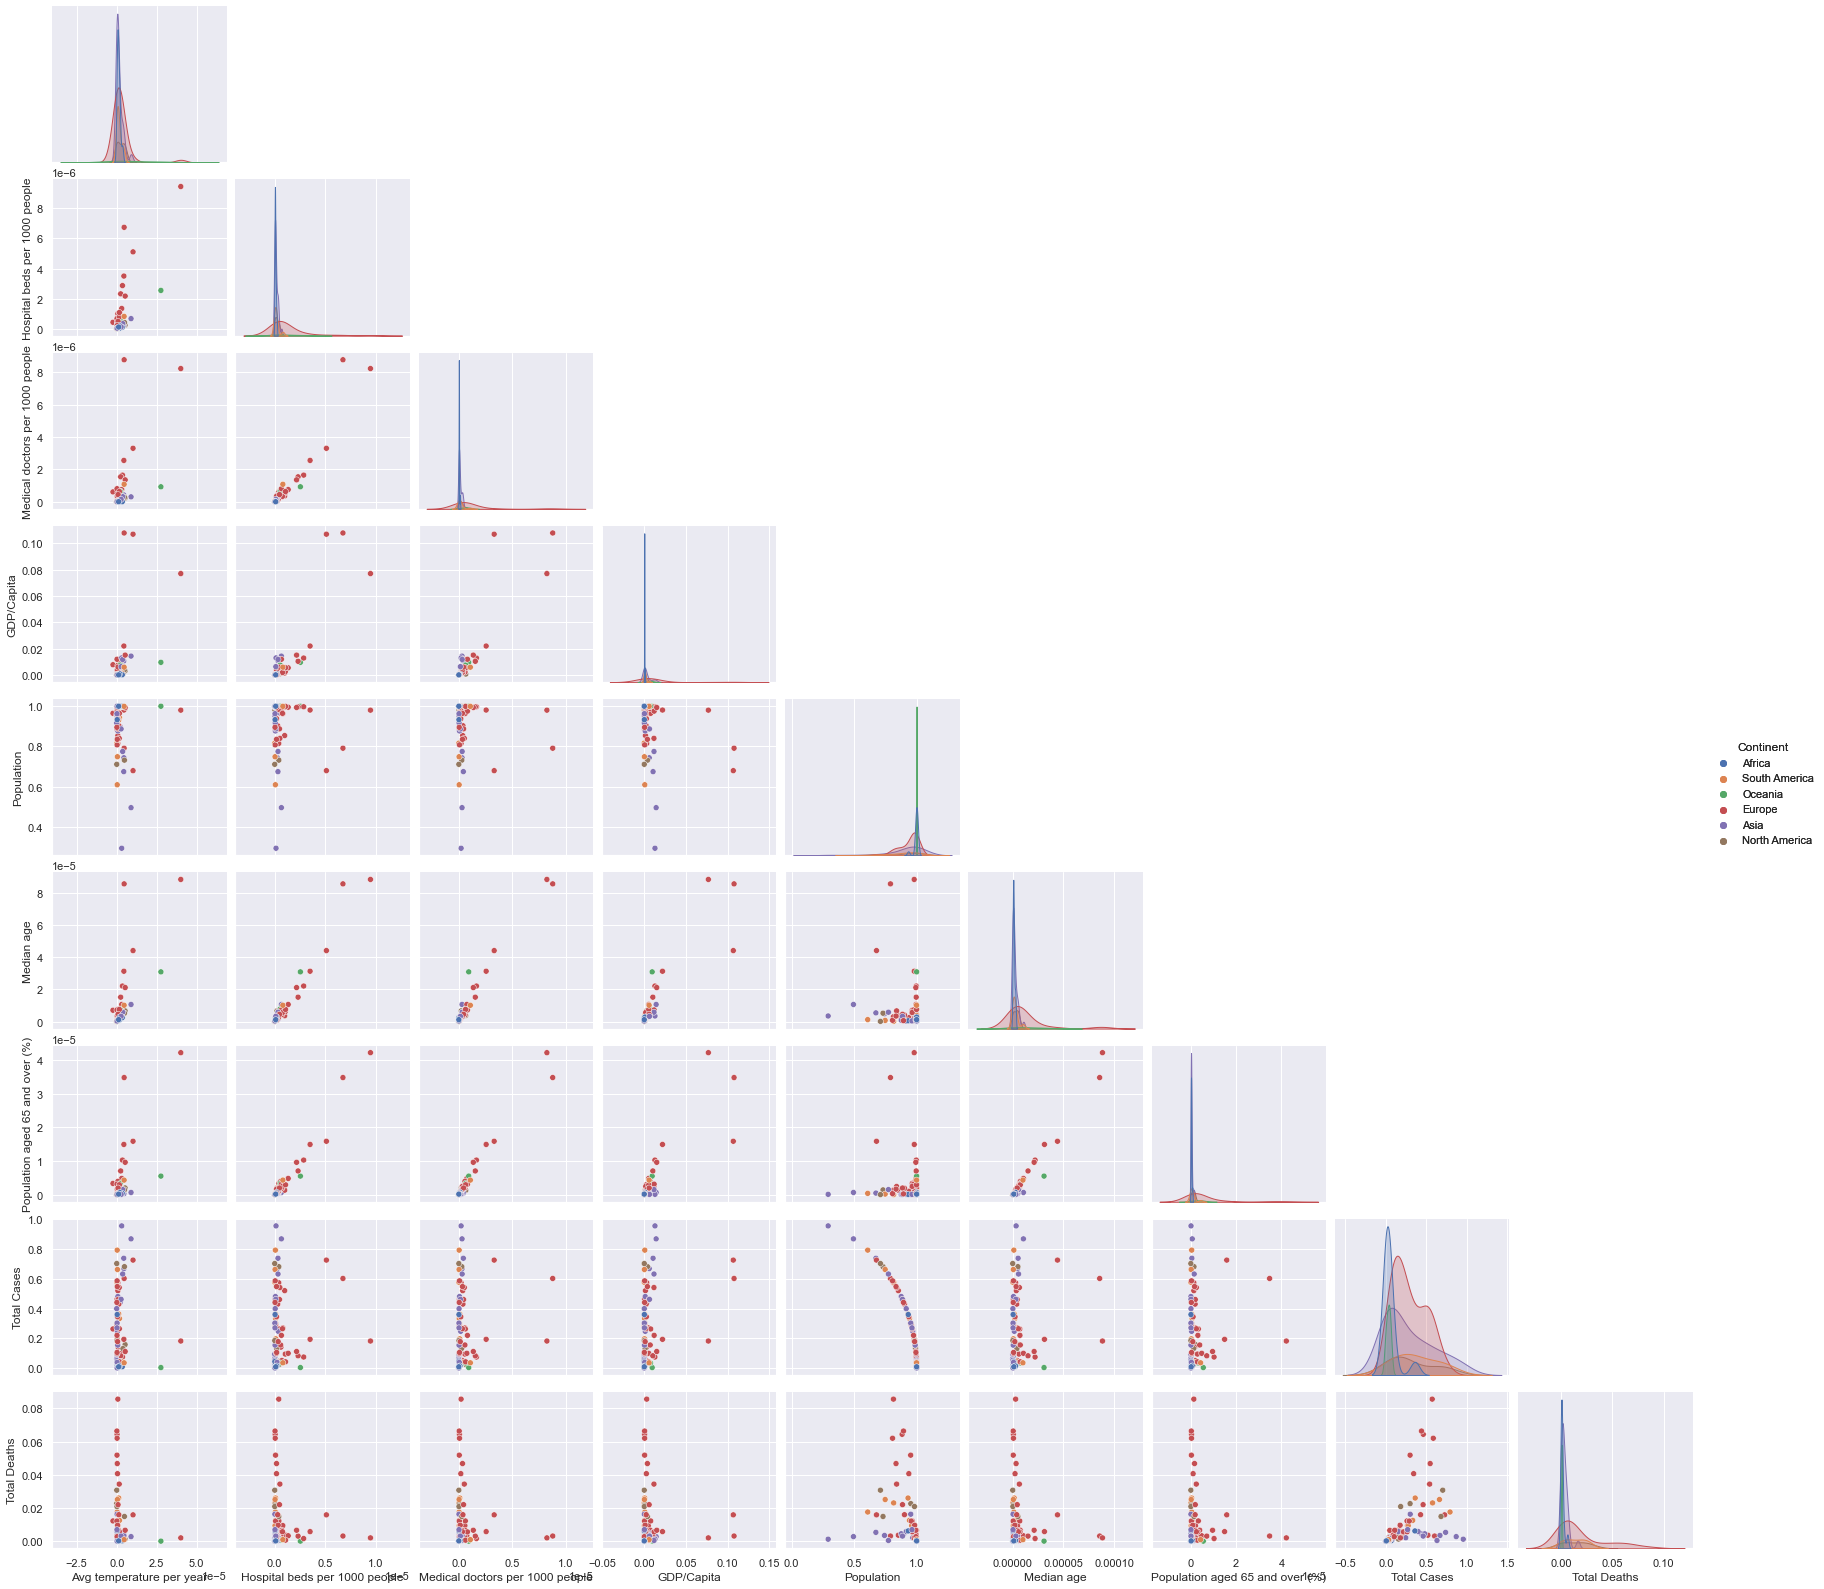

In [22]:
df_pairplot = df_final.copy()
df_pairplot = df_pairplot.drop(columns=['Latitude',
                                       'Longitude'])
sns_plt = sns.pairplot(df_pairplot, hue='Continent', corner=True)
sns_plt.add_legend()


## Exporting to SQLite3 Database

In [24]:
import sqlite3

In [25]:
conn = sqlite3.connect('covid-19-database2.db')
c = conn.cursor()

In [26]:
c.execute('CREATE TABLE IF NOT EXISTS covid19data2 (Country text, Continent text, Latitude real, Longitude real, Avg_temperature_per_year real, Hospital_beds_per_1000_people real, Medical_doctors_per_1000_people real, GDP_per_Capita real, Population int,Median_age int, Population_aged_65_and_over real, Total_Cases int, Total_Deaths int)')
conn.commit()

In [27]:
df_final.to_sql('covid19data2', conn, if_exists='replace', index = False)

90

In [28]:
col_sql = ['Country', 'Continent', 'Latitude', 'Longitude', 'Avg_temperature_per_year', 'Hospital_beds_per_1000_people', 'Medical_doctors_per_1000_people', 'GDP_per_Capita', 'Population', 'Median_age', 'Population_aged_65_and_over', 'Total_Cases', 'Total_Deaths']
df_sql = pd.DataFrame(c.fetchall(), columns=col_sql)
df_sql

,Country,Continent,Latitude,Longitude,Avg_temperature_per_year,Hospital_beds_per_1000_people,Medical_doctors_per_1000_people,GDP_per_Capita,Population,Median_age,Population_aged_65_and_over,Total_Cases,Total_Deaths


In [29]:
conn.close()